In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [3]:
df = pd.read_csv('~/Documents/GitHub/youtube-videos/data/erling_haaland_2022_understat.csv')

In [4]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [5]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [6]:
# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots

total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()
print(points_average_distance, actual_average_distance)

90.2333329983843 11.720000401938833


In [11]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/Users/mckayjohns/Documents/GitHub/youtube-videos/fonts/Arvo/Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)


In [12]:
pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

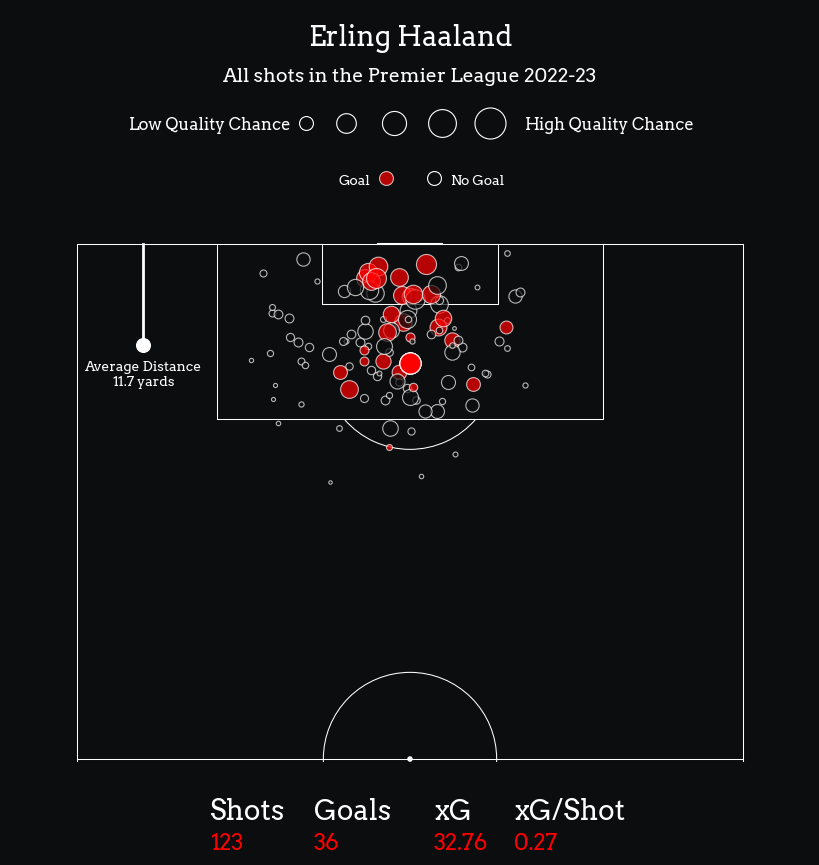

In [13]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Erling Haaland', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Premier League 2022-23', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.set_axis_off()

In [15]:
# Save the figure
fig.savefig('/Users/mckayjohns/Documents/GitHub/youtube-videos/media/erling_haaland_2022.png', facecolor=background_color, bbox_inches='tight')